In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.html.widgets import interact
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
np.random.seed(42)

In [3]:
NMC = 100
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
r = (xmc**2 + ymc**2) ** 0.5

# If r<=1, count 1 else count 0.
accept = np.where(r<=1, 1, 0)
accept_ratio = np.sum(accept) / NMC
print(accept_ratio)

0.8


In [4]:
NMC = 100
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)

@interact(mcs=(0, NMC, 1))
def animation(mcs=0):
    plt.figure(figsize=(5,5))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0, 1, 0.001)
    y = (1-x**2)**0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x, y)
    plt.fill_between(x, y, alpha=0.3)
    plt.fill_between(x, y, y2, alpha=0.3)
    r = (xmc[:mcs]**2 + ymc[:mcs]**2) ** 0.5

    # If r<=1, count 1 else count 0.
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    plt.scatter(xmc[:mcs], ymc[:mcs], color="red", marker=".")
    plt.show()

    print("Monte Carlo", accept_ratio)
    print("Analytical Solution: ", np.pi/4)

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))

In [9]:
NMC = 2000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
pi_mcs = []
for mcs in range(1, NMC):
    r = (xmc[:mcs]**2 + ymc[:mcs]**2) ** 0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept)/mcs
    pi_mcs.append(accept_ratio)

In [10]:
pi_x = np.arange(len(pi_mcs)) + 1

Text(0, 0.5, 'accept ratio')

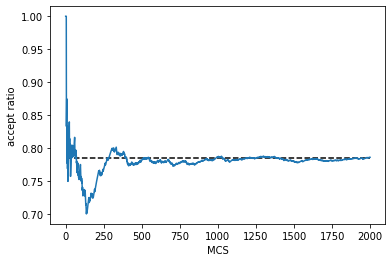

In [11]:
plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyle="dashed")
plt.xlabel("MCS")
plt.ylabel("accept ratio")